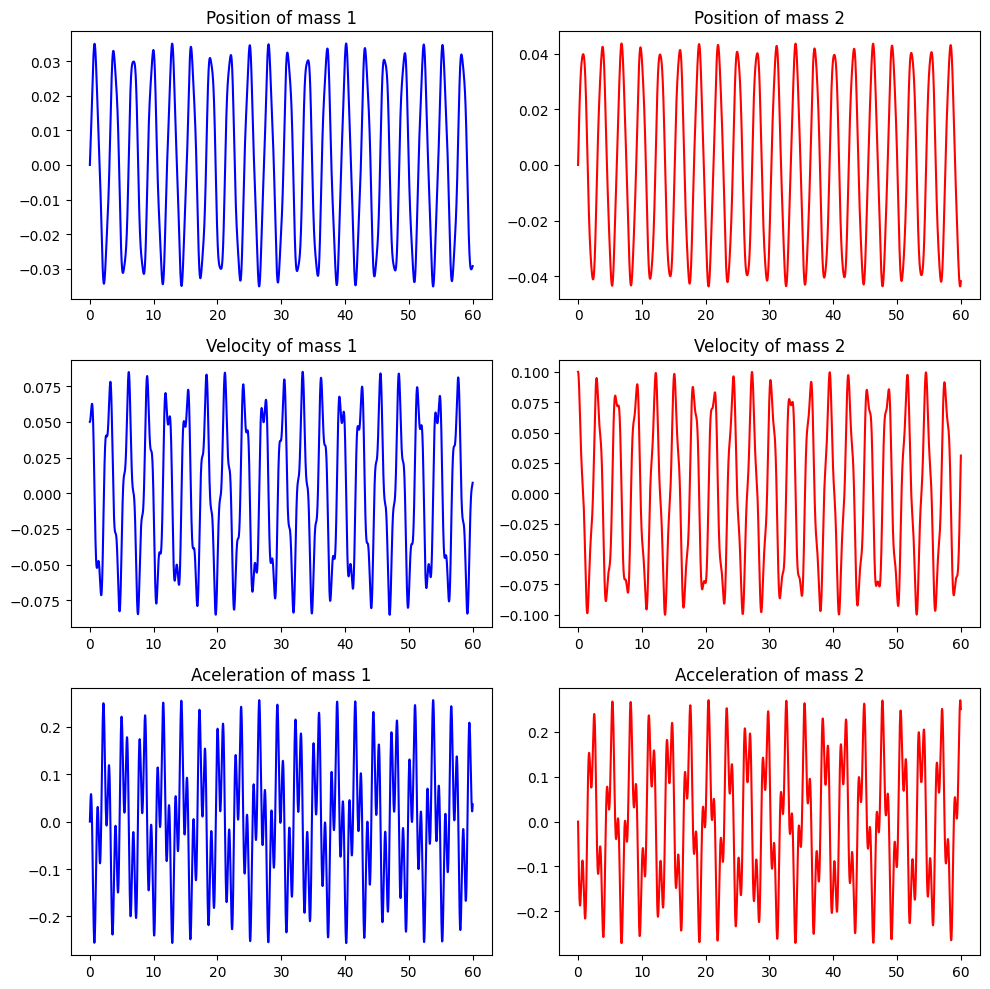

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from meccomp_lib import *

        
system = System(step=0.01)    
rk = RK4(system=system, simulation_time=60)

rk.simul()
rk.plot_results()

1.5 1.5 -0.0 2.25 1.5 0.0
1.5 1.49999999953125 -0.0003671324624617571 2.25 1.49999999953125 -0.0007350994590687397
1.5 1.499999999576953 -0.00037817584192285773 2.25 1.499999999576953 -0.0007277444870071871
1.5 1.499999998307856 -0.0007563693319408621 2.25 1.499999998307856 -0.001455494743255531
1.5 1.499999998307842 -0.00075636816576394 2.25 1.499999998307842 -0.0014554964888885513
1.5 1.499999996325109 -0.0011456182039054873 2.25 1.499999996325109 -0.002175902718041391
1.5 1.4999999964552502 -0.0011566645680856791 2.25 1.4999999964552502 -0.0021685415895003834
1.5 1.4999999939254822 -0.001556976967716735 2.25 1.4999999939254822 -0.0028815918527892825
1.5 1.4999999939254538 -0.001556975729156258 2.25 1.4999999939254538 -0.002881593706901526
1.5 1.4999999909259747 -0.001968345829404875 2.25 1.4999999909259747 -0.003587293421073903
1.5 1.4999999911312534 -0.0019793954090296098 2.25 1.4999999911312534 -0.0035799257763484966
1.5 1.4999999878100565 -0.0024018295068347984 2.25 1.49999998781

c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\ex_1\leg_system.py:39: RuntimeWarning: overflow encountered in double_scalars
  self.m2*self.l1*self.l2*np.sin(theta_1 - theta_2)*(theta_2_dot**2))
c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\ex_1\leg_system.py:43: RuntimeWarning: overflow encountered in double_scalars
  self.m2*self.l1*self.l2*np.sin(theta_1 - theta_2)*(theta_1_dot**2))
C:\Users\guilh\AppData\Local\Temp\ipykernel_6080\4056603562.py:154: RuntimeWarning: invalid value encountered in add
  k2_state = current_state + (self.step/2)*k1
c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\ex_1\leg_system.py:37: RuntimeWarning: invalid value encountered in cos
  B = self.m2*self.l1*self.l2*np.cos(theta_1 - theta_2)
c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\ex_1\leg_system.py:38: RuntimeWarning: invalid value encountered in sin
  C = ( -(self.m1 + self.m2)*self.g*self.

 nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan nan 2.25 nan nan
1.5 nan

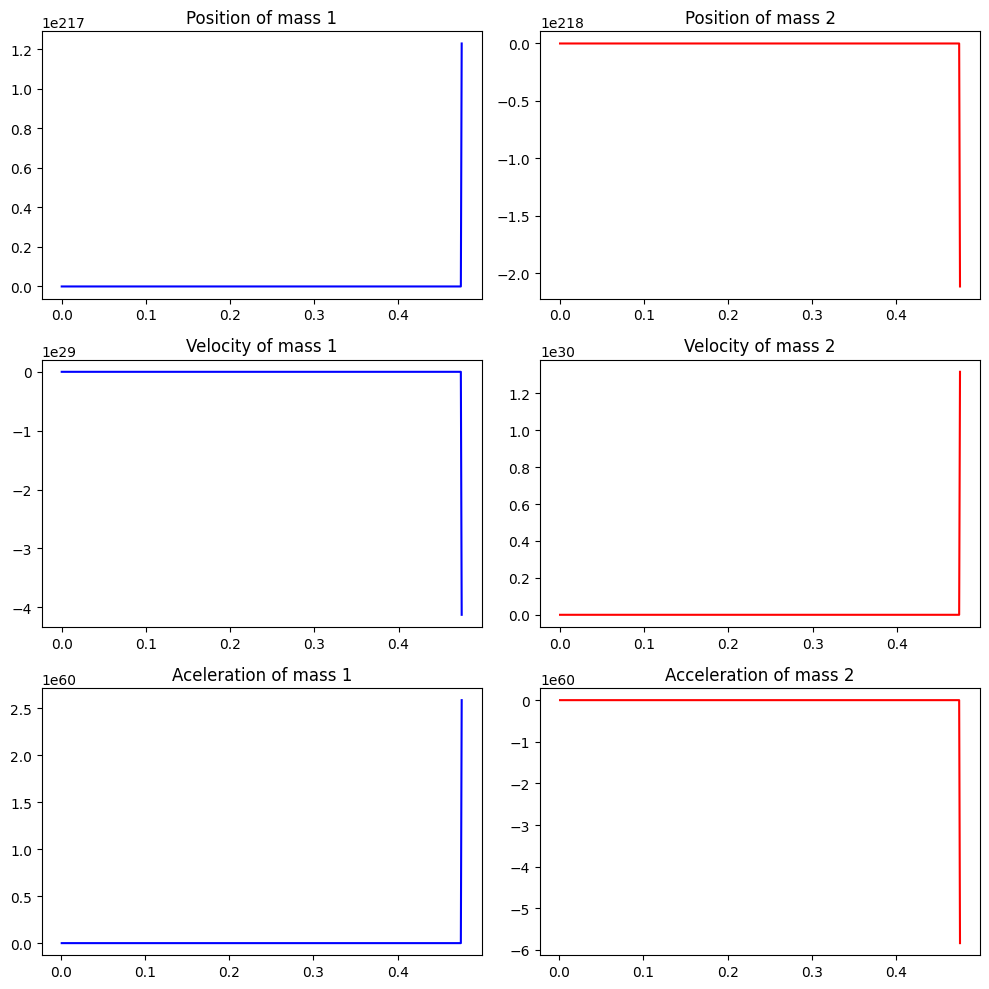

In [2]:


class System:
    def __init__(self,
        m1:float=0.5,
        m2:float=1.0,
        l1:float=1.0,
        l2:float=1.5,
        theta_1_initial:float=0,
        theta_2_initial:float=0,
        theta_1_dot_initial:float=0.05,
        theta_2_dot_initial:float=0.1,
        theta_1_dot_dot_initial:float=np.nan,
        theta_2_dot_dot_initial:float=np.nan,
        step:float=0.1):
        self.m1 = m1
        self.m2 = m2
        self.l1 = l1
        self.l2 = l2
        self.theta_1_initial = theta_1_initial
        self.theta_2_initial = theta_2_initial
        self.theta_1_dot_initial = theta_1_dot_initial
        self.theta_2_dot_initial = theta_2_dot_initial
        self.theta_1_dot_dot_initial = theta_1_dot_dot_initial
        self.theta_2_dot_dot_initial = theta_2_dot_dot_initial
        self.step = step
        self.g = 9.8
        self.reset()
    
    def reset(self):
        self.current_step = 0
        self.state_memory = [[self.theta_1_initial, self.theta_1_dot_initial, self.theta_1_dot_dot_initial, 
                              self.theta_2_initial, self.theta_2_dot_initial, self.theta_2_dot_dot_initial]]
        
    def calculate_constants(self, theta_1, theta_1_dot, theta_2, theta_2_dot):
        A = (self.m1 + self.m2)*(self.l1**2)
        B = self.m2*self.l1*self.l2*np.cos(theta_1 - theta_2)
        C = (-(self.m1 + self.m2)*self.g*self.l1*np.sin(theta_1) -
                self.m2*self.l1*self.l2*np.sin(theta_1 - theta_2)*(theta_2_dot**2))
        D = self.m2*(self.l2**2)
        E = self.m2*self.l1*self.l2*np.cos(theta_1 - theta_2)
        F = (-self.m2*self.g*self.l2*np.sin(theta_2) + 
             self.m2*self.l1*self.l2*np.sin(theta_1 - theta_2)*(theta_1_dot**2))
        return A,B, C, D, E, F
    
    def theta_1_dot_dot(self, **kwargs):
        theta_1 = kwargs.get('theta_1')
        theta_1_dot = kwargs.get('theta_1_dot')
        theta_2 = kwargs.get('theta_2')
        theta_2_dot = kwargs.get('theta_2_dot')

        A, B, C, D ,E , F = self.calculate_constants(theta_1, theta_1_dot, theta_2, theta_2_dot)
        print(A, B, C, D, E, F)
        num = C*E - B*F
        den = A*E - B*D
        return num/den
    
    def theta_2_dot_dot(self, **kwargs):
        theta_1 = kwargs.get('theta_1')
        theta_1_dot = kwargs.get('theta_1_dot')
        theta_2 = kwargs.get('theta_2')
        theta_2_dot = kwargs.get('theta_2_dot')

        A, B, C, D ,E , F = self.calculate_constants(theta_1, theta_1_dot, theta_2, theta_2_dot)
        num = A*F - D*C
        den = A*E - B*D
        return num/den
    
    def get_current_state(self):
        current_state = self.state_memory[self.current_step]
        state = {
            'theta_1': current_state[0],
            'theta_1_dot': current_state[1],
            'theta_1_dot_dot': current_state[2],
            'theta_2': current_state[3],
            'theta_2_dot': current_state[4],
            'theta_2_dot_dot': current_state[5]
        }
        return state
        
    def insert_state(self, state):
        self.state_memory.append(state)
        self.current_step += 1    
    
    
    def retrieve_states(self):
        return self.state_memory
    
    def retrieve_scalar_states(self):
        scalar_states = []
        for state in self.state_memory:
            theta_1 = state[0]
            theta_1_dot = state[1]
            theta_1_dot_dot = state[2]
            theta_2 = state[3]
            theta_2_dot = state[4]
            theta_2_dot_dot = state[5]            
            x_1 = self.l1*np.sin(theta_1)
            x_1_dot = self.l1*np.cos(theta_1)*theta_1_dot
            x_1_dot_dot = self.l1*np.cos(theta_1)*theta_1_dot_dot - self.l1*np.sin(theta_1)*(theta_1_dot**2)
            y_1 = self.l1*np.cos(theta_1)
            y_1_dot = -self.l1*np.sin(theta_1)*theta_1_dot
            y_1_dot_dot = -self.l1*np.cos(theta_1)*(theta_1_dot**2) - self.l1*np.sin(theta_1)*theta_1_dot_dot    
             
            x_2 = self.l2*np.sin(theta_2) + x_1
            x_2_dot = self.l2*np.cos(theta_2)*theta_2_dot + x_1_dot
            x_2_dot_dot = self.l2*np.cos(theta_2)*theta_2_dot_dot - self.l2*np.sin(theta_2)*(theta_2_dot**2)  + x_1_dot_dot
            y_2 = self.l2*np.cos(theta_2) + y_1
            y_2_dot = -self.l2*np.sin(theta_2)*theta_2_dot + y_1_dot
            y_2_dot_dot = -self.l2*np.cos(theta_2)*(theta_2_dot**2) - self.l2*np.sin(theta_2)*theta_2_dot_dot + y_1_dot_dot
            scalar_state = [[x_1, y_1],[x_1_dot, y_1_dot], [x_1_dot_dot, y_1_dot_dot],
                            [x_2, y_2],[x_2_dot, y_2_dot], [x_2_dot_dot, y_2_dot_dot]]
            scalar_states.append(scalar_state)
        return scalar_states
    
    

class RK4(BaseMethod):
    def __init__(self, step:float=0.01, simulation_time:float = 10):
        super().__init__(step=step, simulation_time=simulation_time)
       
    def apply_f(self, state):
        theta_1 = state[0]
        theta_1_dot = state[1]
        theta_2 = state[2]
        theta_2_dot = state[3]
        state_kwargs ={
            'theta_1' : theta_1,
            'theta_1_dot' : theta_1_dot,
            'theta_2' : theta_2,
            'theta_2_dot' : theta_2_dot, 
        }

        theta_1_dot_dot = self.system.theta_1_dot_dot(**state_kwargs)

        theta_2_dot_dot = self.system.theta_2_dot_dot(**state_kwargs)
        
        result = [theta_1_dot, theta_1_dot_dot, theta_2_dot, theta_2_dot_dot]

        return  result 

        
        
    def simul(self):
        self.system.reset()
        current_state = self.system.get_current_state()
        current_state = np.array([current_state['theta_1'],
                                  current_state['theta_1_dot'],
                                  current_state['theta_2'], 
                                  current_state['theta_2_dot']])
        
        for time_step in range(self.n_steps): 
            k1 = self.apply_f(current_state)
            k1 = np.array(k1)
            
            k2_state = current_state + (self.step/2)*k1
            k2 = self.apply_f(k2_state)
            k2 = np.array(k2)
            
            k3_state = current_state + (self.step/2)*k2
            k3 = self.apply_f(k3_state)
            k3 = np.array(k3)
            
            k4_state = current_state + (self.step)*k3
            k4 = self.apply_f(k4_state)
            
            next_state = current_state + (self.step/6)*(k1 + 2*k2 + 2*k3 + k4)
            
            next_theta_1 = next_state[0]
            next_theta_1_dot = next_state[1]
            next_theta_1_dot_dot = k1[1]
            next_theta_2 = next_state[2]
            next_theta_2_dot = next_state[3]
            next_theta_2_dot_dot = k1[3]
            
            system_state = [next_theta_1, 
                            next_theta_1_dot, 
                            next_theta_1_dot_dot, 
                            next_theta_2, 
                            next_theta_2_dot, 
                            next_theta_2_dot_dot]
            
            current_state = next_state
            self.system.insert_state(system_state)
            
            
         
            
rk = RK4(step = 0.001, simulation_time=60)

rk.simul()
rk.plot_results()

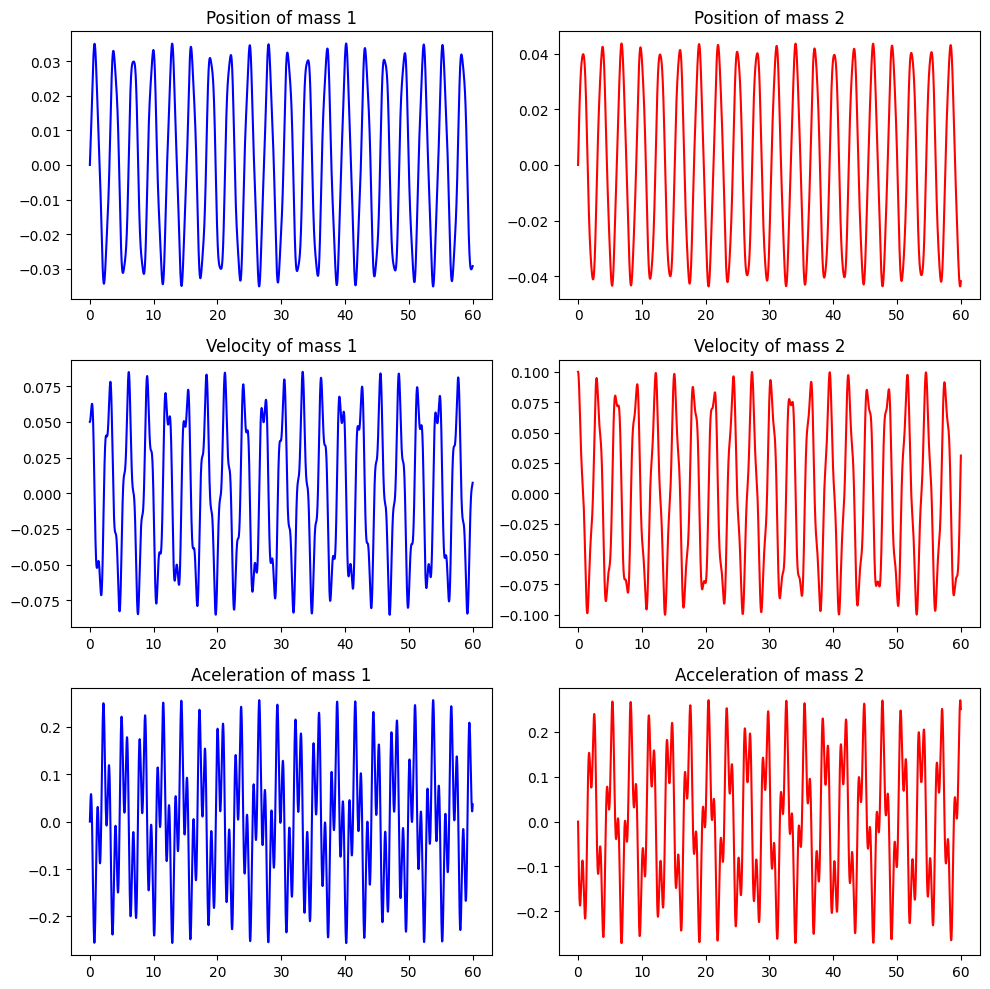

In [ ]:

rk = RK4(step = 0.01, simulation_time=60)

rk.simul()
rk.plot_results()

In [ ]:
import numpy as np

def conjugate_gradient(A, b, omega=1.85, tolerance=0.01, max_iterations=1000):
    n = len(b)
    x = np.zeros(n)  # Começando com uma solução inicial de zero
    r = b - A.dot(x)  # Resíduo inicial
    p = r.copy()      # Vetor de direção inicial

    for k in range(max_iterations):
        alpha = np.inner(r, r) / np.inner(p, A.dot(p))
        x = x + omega * alpha * p
        r_new = r - alpha * A.dot(p)

        if np.linalg.norm(r_new) < tolerance:
            break
        
        beta = np.inner(r_new, r_new) / np.inner(r, r)
        p = r_new + beta * p
        r = r_new

    return x

# Exemplo de uso
A = np.array([[4, -1, 0],
              [-1, 4, -1],
              [0, -1, 3]])

b = np.array([2, -3, 4])

x = conjugate_gradient(A, b, omega=1.85, tolerance=0.01)
print("Solução aproximada:", x)


Solução aproximada: [ 0.76707317 -0.63170732  2.25609756]
